<a href="https://colab.research.google.com/github/marufa181/CERTIFICATE/blob/main/0112230230_Logistic_Regression_Assignment_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment-04  Binary Logistic Regression

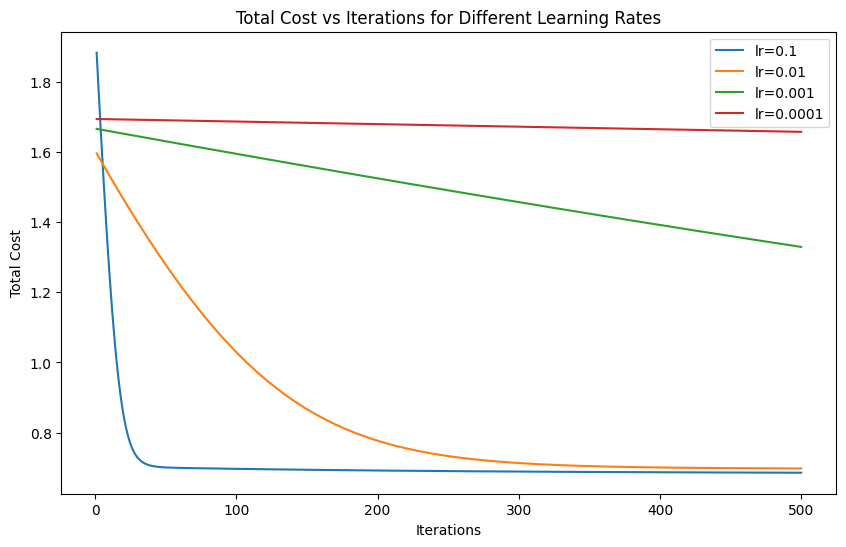

   Learning Rate  Test Accuracy
0         0.1000           45.0
1         0.0100           45.0
2         0.0010           49.0
3         0.0001           49.0


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

feature_cols = [
    "MonthlyCharges", "TotalCharges", "Tenure", "InternetUsageHours",
    "StreamingServicesCount", "ContractLengthMonths", "SupportTicketsResolved",
    "PaymentFailures", "DataOverages", "AdditionalServicesCount"
]

target_col = "Churn"

data = pd.read_csv("dataset.csv")

X = data[feature_cols].values
y = data[target_col].values

# Normalize the features
X = (X - np.min(X, axis=0)) / (np.max(X, axis=0) - np.min(X, axis=0))

# training and test sets (80%-20%)
def train_test_split(X, y, test_size=0.2, random_state=None):
    np.random.seed(random_state)
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)
    split = int(X.shape[0] * (1 - test_size))
    X_train, X_test = X[indices[:split]], X[indices[split:]]
    y_train, y_test = y[indices[:split]], y[indices[split:]]
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def logistic_regression(X_train, y_train, X_test, y_test, lr, max_iter):
    n_features = X_train.shape[1]
    weights = np.random.uniform(0, 1, n_features)
    bias = np.random.uniform(0, 1)

    history = []

    for _ in range(max_iter):
        total_cost = 0
        dw = np.zeros(n_features)
        db = 0

        for i in range(len(X_train)):
            X_i = X_train[i]
            y_i = y_train[i]

            # prediction
            z = np.dot(X_i, weights) + bias
            h = sigmoid(z)

            # loss
            loss = -y_i * np.log(h) - (1 - y_i) * np.log(1 - h)
            total_cost += loss

            # Gradients
            dw += (h - y_i) * X_i
            db += (h - y_i)

        # Update weights and bias
        weights -= lr * (dw / len(X_train))
        bias -= lr * (db / len(X_train))

        # Store average cost
        history.append(total_cost / len(X_train))

    # Validation
    correct = 0
    for i in range(len(X_test)):
        X_i = X_test[i]
        y_i = y_test[i]

        # Predict
        z = np.dot(X_i, weights) + bias
        h = sigmoid(z)
        prediction = 1 if h >= 0.5 else 0

        if prediction == y_i:
            correct += 1

    test_acc = (correct / len(X_test)) * 100
    return history, test_acc

learning_rates = [0.1, 0.01, 0.001, 0.0001]
max_iter = 500
results = []

plt.figure(figsize=(10, 6))

for lr in learning_rates:
    history, test_acc = logistic_regression(X_train, y_train, X_test, y_test, lr, max_iter)
    results.append((lr, test_acc))
    plt.plot(range(1, max_iter + 1), history, label=f"lr={lr}")

plt.xlabel("Iterations")
plt.ylabel("Total Cost")
plt.title("Total Cost vs Iterations for Different Learning Rates")
plt.legend()
plt.show()

results_table = pd.DataFrame(results, columns=["Learning Rate", "Test Accuracy"])
print(results_table)